In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3, n_features=2)

In [3]:
X

array([[-8.03892552,  1.31108537],
       [ 2.1597792 ,  3.85585352],
       [ 1.51395866,  3.87112637],
       ...,
       [-7.81622007,  0.17611892],
       [-7.09417837,  0.91209226],
       [-7.96926168,  3.41052788]], shape=(1000, 2))

In [4]:
y

array([0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2,
       0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0,

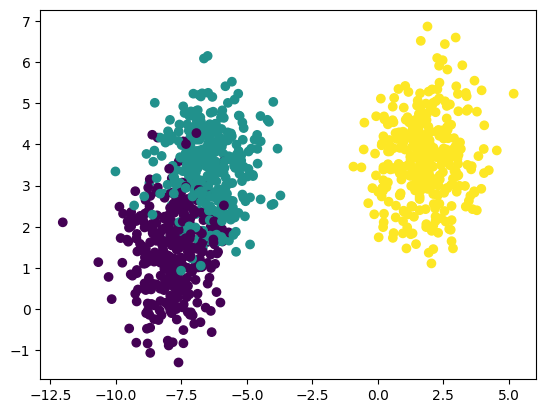

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization -- feature scaling techinique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train,X_test, y_train, y_test= train_test_split( X,y,test_size=0.33,random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method to select K vlue
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    

In [12]:
wcss

[1340.0000000000002,
 587.8174714414397,
 291.52392428231474,
 219.7017407060416,
 153.2711367005789,
 131.34670216084228,
 102.39019147469519,
 88.25825049189855,
 77.34444702489989,
 68.24244161801566]

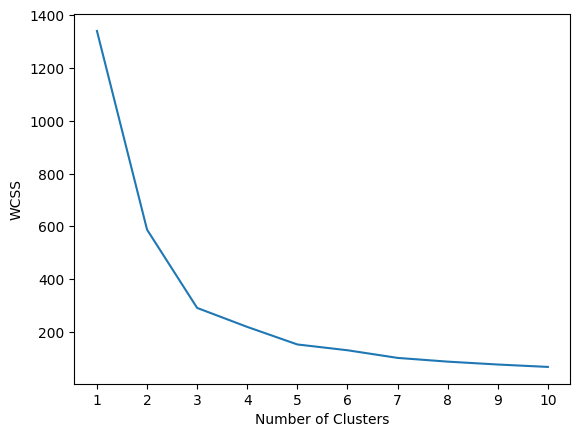

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [26]:
kmeans=KMeans(n_clusters=5,init="k-means++")

In [27]:
kmeans.fit_predict(X_train_scaled)

array([4, 4, 2, 4, 1, 3, 1, 0, 0, 3, 0, 1, 3, 3, 0, 0, 0, 1, 2, 3, 4, 4,
       4, 0, 3, 3, 1, 1, 2, 2, 0, 1, 4, 0, 1, 4, 3, 4, 3, 1, 1, 0, 2, 3,
       3, 2, 3, 1, 2, 0, 3, 0, 1, 3, 3, 0, 0, 3, 4, 1, 2, 3, 1, 4, 4, 1,
       0, 2, 0, 1, 2, 0, 1, 3, 0, 2, 1, 4, 0, 2, 3, 1, 3, 2, 2, 2, 3, 2,
       1, 2, 0, 0, 2, 2, 1, 3, 4, 2, 0, 2, 4, 3, 2, 4, 0, 4, 2, 3, 1, 0,
       2, 0, 1, 1, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 4, 3, 2, 0, 4, 3, 2,
       0, 3, 2, 3, 2, 1, 4, 3, 1, 3, 1, 3, 0, 1, 3, 3, 4, 0, 2, 4, 2, 2,
       0, 0, 1, 4, 0, 4, 4, 2, 2, 3, 4, 1, 4, 4, 4, 0, 0, 4, 0, 4, 1, 1,
       4, 2, 1, 1, 4, 2, 4, 0, 4, 2, 3, 2, 2, 2, 2, 1, 1, 3, 2, 4, 4, 0,
       0, 2, 4, 0, 2, 3, 2, 1, 3, 2, 3, 4, 4, 1, 2, 4, 3, 4, 0, 1, 4, 2,
       1, 4, 0, 2, 2, 2, 3, 3, 1, 1, 1, 4, 1, 1, 2, 2, 0, 4, 0, 2, 0, 0,
       2, 3, 0, 4, 0, 3, 2, 3, 3, 2, 4, 1, 2, 0, 2, 4, 0, 4, 4, 2, 1, 2,
       0, 0, 4, 4, 2, 2, 4, 4, 4, 2, 3, 4, 2, 3, 4, 3, 2, 2, 3, 2, 2, 2,
       1, 4, 0, 2, 2, 3, 2, 1, 2, 4, 1, 3, 1, 3, 2,

In [28]:
y_pred=kmeans.predict(X_test_scaled)

In [29]:
y_pred

array([2, 4, 4, 1, 0, 1, 4, 4, 3, 2, 0, 0, 4, 2, 3, 2, 0, 2, 2, 2, 0, 3,
       0, 0, 2, 4, 2, 0, 1, 2, 4, 2, 3, 3, 2, 3, 0, 1, 4, 3, 0, 4, 1, 0,
       4, 3, 4, 2, 2, 0, 0, 3, 3, 1, 3, 2, 0, 0, 4, 2, 4, 0, 4, 1, 4, 0,
       2, 3, 2, 4, 4, 2, 4, 1, 1, 4, 4, 3, 0, 2, 2, 2, 3, 0, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 4, 4, 3, 2, 4, 2, 0, 0, 4, 4,
       4, 4, 1, 2, 2, 4, 4, 2, 2, 0, 0, 2, 1, 1, 1, 2, 3, 4, 2, 2, 2, 2,
       3, 0, 2, 1, 3, 1, 1, 3, 3, 2, 3, 2, 1, 3, 2, 1, 1, 0, 1, 4, 2, 1,
       4, 1, 3, 4, 1, 4, 1, 2, 4, 2, 3, 3, 2, 2, 2, 4, 3, 1, 4, 0, 2, 1,
       0, 2, 2, 2, 2, 1, 3, 2, 4, 3, 4, 4, 1, 4, 0, 4, 2, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 0, 2, 1, 4, 2, 1,
       2, 4, 2, 1, 1, 0, 1, 2, 4, 2, 2, 1, 3, 0, 3, 1, 4, 2, 4, 0, 2, 2,
       3, 2, 2, 3, 4, 2, 3, 2, 2, 1, 3, 3, 2, 3, 4, 1, 4, 4, 4, 4, 3, 2,
       4, 2, 2, 4, 1, 3, 3, 2, 2, 3, 4, 0, 0, 4, 3, 0, 2, 3, 0, 3, 2, 0,
       1, 3, 0, 3, 0, 4, 1, 0, 1, 4, 2, 4, 1, 4, 1,

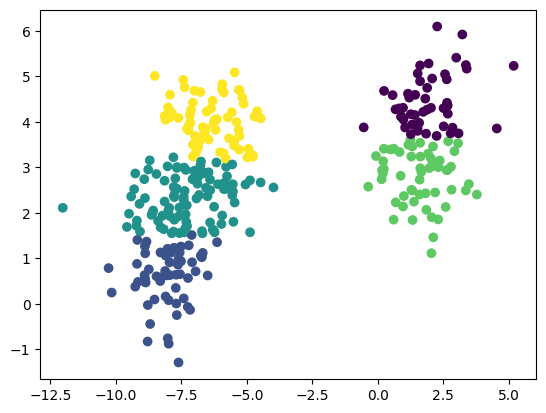

In [30]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## kneelocator
## Silhoute scoring

In [31]:
## kneelocator
!pip install kneed

In [32]:
from kneed import KneeLocator

In [34]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [35]:
kl.elbow

np.int64(3)

In [38]:
## silhoute score
from sklearn.metrics import silhouette_score

In [40]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [41]:
silhouette_coefficients

[0.5431708780775647,
 0.5449180126888395,
 0.5009300442535103,
 0.45451593760981457,
 0.43171163727885314,
 0.416483795212316,
 0.40080861745548735,
 0.37924846949843155,
 0.3768317334428256]

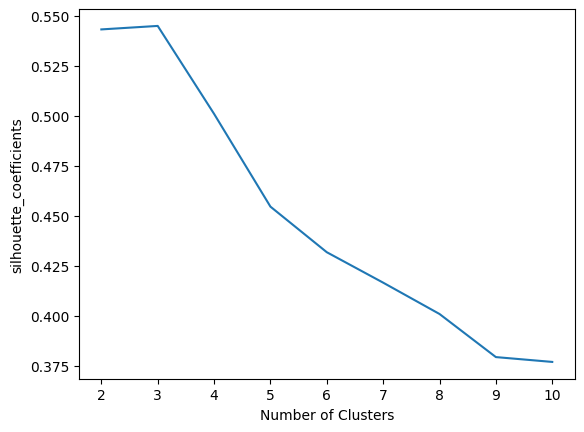

In [42]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()